LINEAR REGRESSION
THE NORMAL EQUATION


In [2]:
import numpy as np
import sys
import sklearn
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
x=2*np.random.rand(100,1)
y=4+3*x+np.random.randn(100,1)

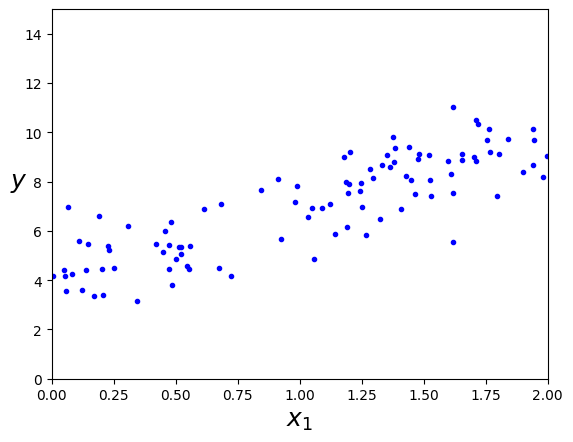

In [3]:
plt.plot(x,y,"b.")
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.axis([0,2,0,15])
plt.show()

In [4]:
x_b=np.c_[np.ones((100,1)),x]
theta_best=np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
theta_best


array([[4.09673503],
       [2.82322174]])

In [5]:
x_new=np.array([[0],[2]])
x_new_b=np.c_[np.ones((2,1)),x_new]
print(x_new_b)
y_predict=x_new_b.dot(theta_best)
y_predict

[[1. 0.]
 [1. 2.]]


array([[4.09673503],
       [9.74317852]])

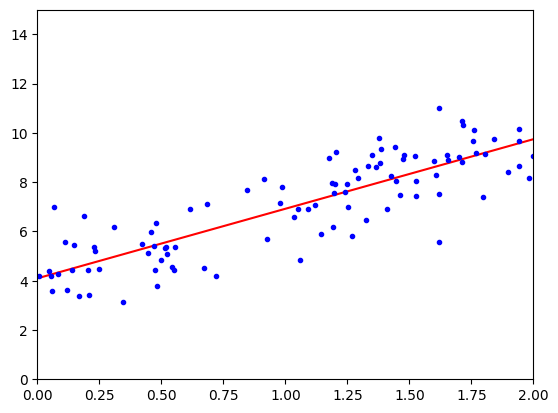

In [6]:
plt.plot(x_new,y_predict,'r-')
plt.plot(x,y,'b.')
plt.axis([0,2,0,15])
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x,y)
lin_reg.intercept_,lin_reg.coef_

(array([4.09673503]), array([[2.82322174]]))

In [8]:
lin_reg.predict(x_new)

array([[4.09673503],
       [9.74317852]])

In [9]:
theta_best_svd,residuals,rank,s=np.linalg.lstsq(x_b,y,rcond=1e-6)
theta_best_svd

array([[4.09673503],
       [2.82322174]])

In [10]:
np.linalg.pinv(x_b).dot(y)

array([[4.09673503],
       [2.82322174]])

In [11]:
u,s,v=np.linalg.svd(x_b)
s

array([15.05359936,  3.95098069])

GRADIENT DESCENT


- measures the local gradient of the error function with regard to parameter vector theta, and it goes in the direction of the descending gradient.

- start with filling theta with random values(random initialization)

- learning rate hyperparameter

- 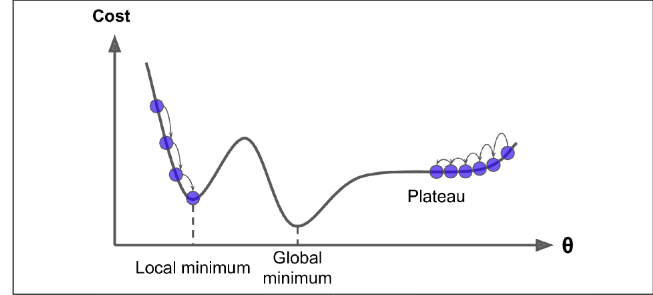

- MSE cost function for a linear regression is convex, which means that if we pick any 2 points on the curve, the line segment joining them never crosses the curve.
- no local minima.
- also a continuous function that never changes abruptly

- more dimensions; more space -> harder search


# batch gradient descent

- we need to compute the gradient of the cost function with regard to each model parameter thetaj.
- partial derivative
  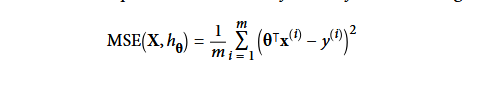
  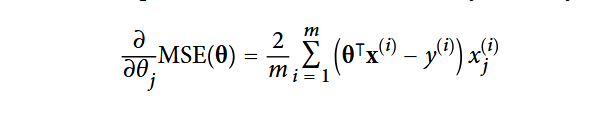
  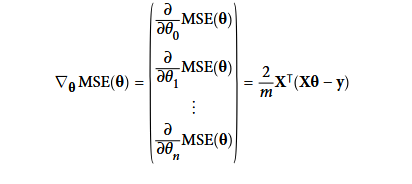

- batch gradient descent uses the whole training set X, at each gradient descent step


In [12]:
eta=0.1# learning rate
n_iterations=1000
m=100
theta=np.random.randn(2,1)
for iteration in range(n_iterations):
    gradients=2/m*x_b.T.dot(x_b.dot(theta)-y)
    theta=theta-eta*gradients
theta

array([[4.09673503],
       [2.82322174]])

In [13]:
x_new_b.dot(theta)

array([[4.09673503],
       [9.74317852]])

In [14]:
theta_path_bgd=[]
def plot_gradient_descent(theta,eta,theta_path=None):
    m=len(x_b)
    plt.plot(x,y,'b.')
    n_iterations=1000
    for iteration in range(n_iterations):
        if iteration<10:# first 10 steps
            y_predict=x_new_b.dot(theta)
            style='b-' if iteration>0 else"r--"
            plt.plot(x_new,y_predict,style)
        gradients=2/m*x_b.T.dot(x_b.dot(theta)-y)
        theta=theta-eta*gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$",fontsize=18)
    plt.axis([0,2,0,15])
    plt.title(r"$eta={}$".format(eta),fontsize=16)


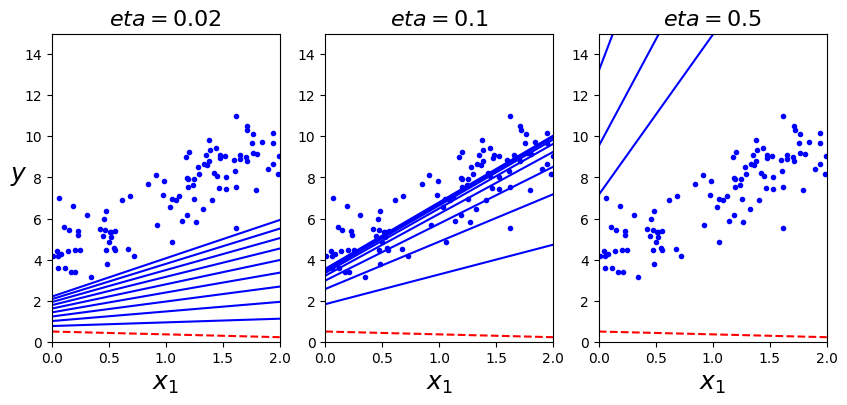

In [15]:
np.random.seed(42)
theta=np.random.randn(2,1)
plt.figure(figsize=(10,4))
plt.subplot(131);plot_gradient_descent(theta,eta=0.02)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.subplot(132);plot_gradient_descent(theta,eta=0.1,theta_path=theta_path_bgd)
plt.subplot(133);plot_gradient_descent(theta,eta=0.5)
plt.show()

- tolerance(epsilon)- the norm becomes too small
- can take O(1/epsilon) time to converge


# STOCHASTIC GRADIENT DESCENT

- picks a random instance in the training set at every step and computes the gradients based on that single instance.

- converges way too fast but once it reaches the minima, the cost function will bounce up and down, decreasing only on average.

- randomness is good to escape the local minima, but bad as the algorithm can never settle at the minima.

- reduce the learning rate gradually.

##### Simulated annealing

- the function that determines the learning rate at each iteration is called learning schedule


In [16]:
# m=len(x_b)
# t0,t1=5,50
# np.random.seed(42)
# epochs=50
# def learning_schedule(t):
#     return t0/(t+t1)
# theta=np.random.randn(2,1)
# for i in range(epochs):
#     for j in range(m):
#         random_index=np.random.randint(m)
#         x1=x_b[random_index:random_index+1]
#         y1=y[random_index:random_index+1]
#         gradients=2*x1.T.dot(x1.dot(theta)-y1)
#         eta=learning_schedule(i*m+j)
#         theta=theta-eta*gradients
# theta

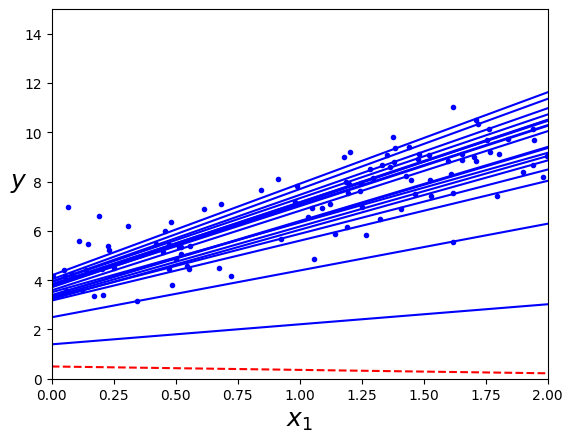

In [17]:
theta_path_sgd=[]
m=len(x_b)
np.random.seed(42)
n_epochs=50
t0,t1=5,50 # learning schedule hyperparameters
def learning_schedule(t):
    return t0/(t+t1)
theta=np.random.randn(2,1) #random initialization
for epoch in range(n_epochs):
    for i in range(m):
        if epoch==0 and i<20:
            y_predict=x_new_b.dot(theta)
            style="b-" if i>0 else "r--"
            plt.plot(x_new,y_predict,style)
        random_index=np.random.randint(m)
        xi=x_b[random_index:random_index+1]
        yi=y[random_index:random_index+1]
        gradients=2*xi.T.dot(xi.dot(theta)-yi)
        eta=learning_schedule(epoch*m+i)
        theta=theta-eta*gradients
        theta_path_sgd.append(theta)
plt.plot(x,y,'b.')
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.axis([0,2,0,15])
plt.show()

In [18]:
theta


array([[4.11228283],
       [2.84667802]])

- while using SGD, the training instances must be independent and identically distributed to ensure that the parameters get pulled towards the global optimum


In [19]:
theta=np.random.randn(2,1)
theta

array([[ 0.30826084],
       [-2.1566007 ]])

In [20]:
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(max_iter=1000,tol=1e-3,penalty=None,eta0=0.1,random_state=42)
sgd_reg.fit(x,y.ravel())

,loss,'squared_error'
,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,42


In [21]:
sgd_reg.intercept_,sgd_reg.coef_

(array([4.05258421]), array([2.85533726]))

# Mini-batch Gradient descent

- computes gradients on small batches (random sets).

- performance boost from hardware optimization of matrix operations


In [22]:
theta_path_mgd=[]
n_iterations=50
minibatch_size=20
np.random.seed(42)
theta=np.random.randn(2,1)
t0,t1=200,1000
def learning_schedule(t):
    return t0/(t+t1)
t=0
for epoch in range(n_iterations):
    shuffled_indices=np.random.permutation(m)
    x_b_shuffled=x_b[shuffled_indices]
    y_shuffled=y[shuffled_indices]
    for i in range(0,m,minibatch_size):
        t+=1
        xi=x_b_shuffled[i:i+minibatch_size]
        yi=y_shuffled[i:i+minibatch_size]
        gradients=2/minibatch_size*xi.T.dot(xi.dot(theta)-yi)
        eta=learning_schedule(t)
        theta=theta-eta*gradients
        theta_path_mgd.append(theta)

In [23]:
theta

array([[4.12250903],
       [2.83998992]])

In [24]:
theta_path_bgd=np.array(theta_path_bgd)
theta_path_sgd=np.array(theta_path_sgd)
theta_path_mgd=np.array(theta_path_mgd)


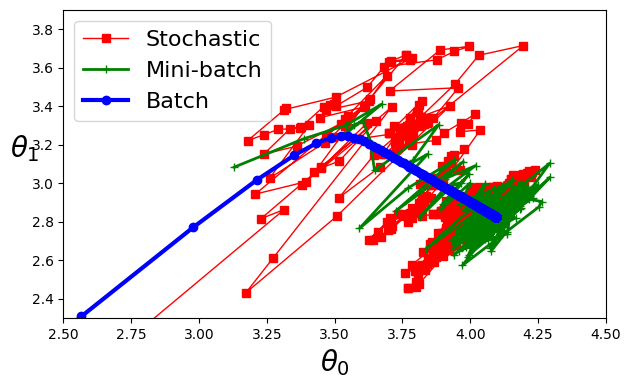

In [25]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:,0],theta_path_sgd[:,1],"r-s",linewidth=1,label="Stochastic")
plt.plot(theta_path_mgd[:,0],theta_path_mgd[:,1],"g-+",linewidth=2,label="Mini-batch")
plt.plot(theta_path_bgd[:,0],theta_path_bgd[:, 1],"b-o",linewidth=3,label="Batch")
plt.legend(loc="upper left",fontsize=16)
plt.xlabel(r"$\theta_0$",fontsize=20)
plt.ylabel(r"$\theta_1$ ",fontsize=20,rotation=0)
plt.axis([2.5,4.5,2.3,3.9])
plt.show()

# POLYNOMIAL REGRESSION(Linear Model)

- used for complex data (not a straight line)
- add powers of each feature as new features, then train a linear model on this extended set of features.


In [26]:
m=100
X=6*np.random.rand(m,1)-3
y=0.5*X**2+X+2+np.random.randn(m,1)


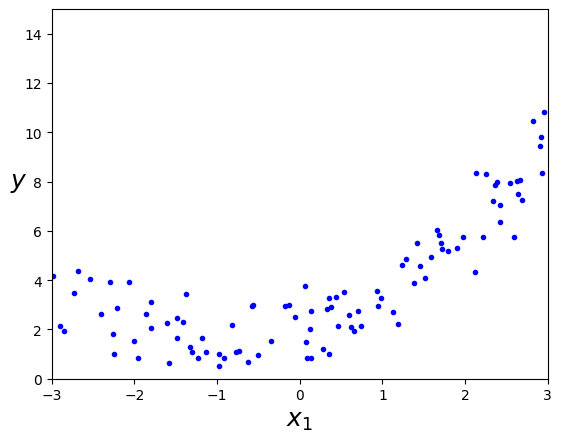

In [27]:
plt.plot(X,y,"b.")
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel('$y$',rotation=0,fontsize=18)
plt.axis([-3,3,0,15])
plt.show()


In [28]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2,include_bias=False)
X_poly=poly_features.fit_transform(X)
X[0]

array([2.38942838])

In [29]:
X_poly[0]

array([2.38942838, 5.709368  ])

In [30]:
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([1.9735233]), array([[0.95038538, 0.52577032]]))

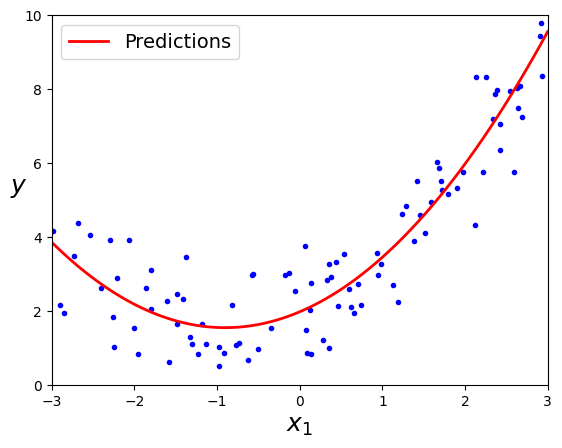

In [31]:
X_new=np.linspace(-3,3,100).reshape(100,1)
X_new_poly=poly_features.transform(X_new)
y_new=lin_reg.predict(X_new_poly)
plt.plot(X,y,"b.")
plt.plot(X_new,y_new,"r-",linewidth=2,label="Predictions")
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$",fontsize=18,rotation=0)
plt.legend(loc="upper left",fontsize=14)
plt.axis([-3,3,0,10])
plt.show()

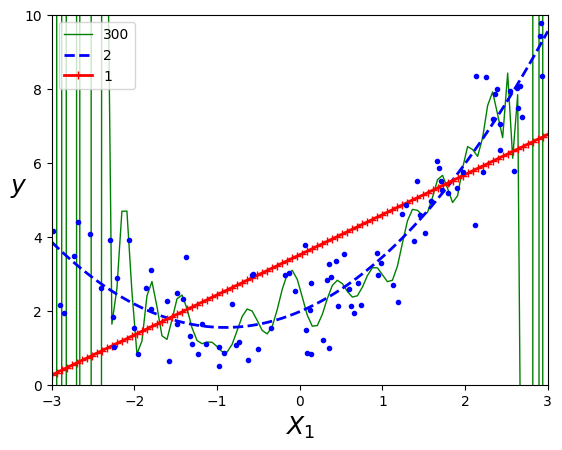

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
for style,width,degree in(("g-",1,300),("b--",2,2),("r-+",2,1)):
    polybig_features=PolynomialFeatures(degree=degree,include_bias=False)
    std_scaler=StandardScaler()
    lin_reg=LinearRegression()
    polynomial_reg=Pipeline([
        ("poly_features",polybig_features),
        ("std_scaler",std_scaler),
        ("lin_reg",lin_reg),
    ])
    polynomial_reg.fit(X,y)
    y_newbig=polynomial_reg.predict(X_new)
    plt.plot(X_new,y_newbig,style,label=str(degree),linewidth=width)
plt.plot(X,y,"b.",linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$X_1$",fontsize=18)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.axis([-3,3,0,10])
plt.show()

- the high-degree polynomial is overfitting it.


LEARNING CURVES


In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model,X,y):
    X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2)
    train_errors,val_errors=[],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict=model.predict(X_train[:m])
        y_val_predict=model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        val_errors.append(mean_squared_error(y_val,y_val_predict))
    plt.plot(np.sqrt(train_errors),'r-+',linewidth=2,label="train")
    plt.plot(np.sqrt(val_errors),'b-',linewidth=4,label='val')
    plt.legend(loc="upper right",fontsize=14)
    plt.xlabel("Training set size",fontsize=14)
    plt.ylabel("RMSE",rotation=90,fontsize=14)

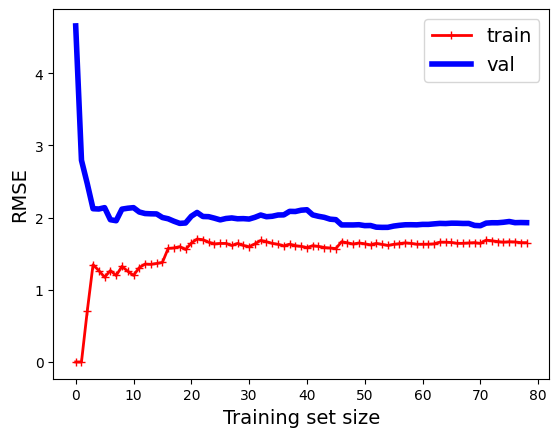

In [34]:
plot_learning_curves(lin_reg,X,y)

In [35]:
polynomial_reg=Pipeline([
    ("poly_features",PolynomialFeatures(degree=10,include_bias=False)),
    ("lin_reg",LinearRegression()),
])

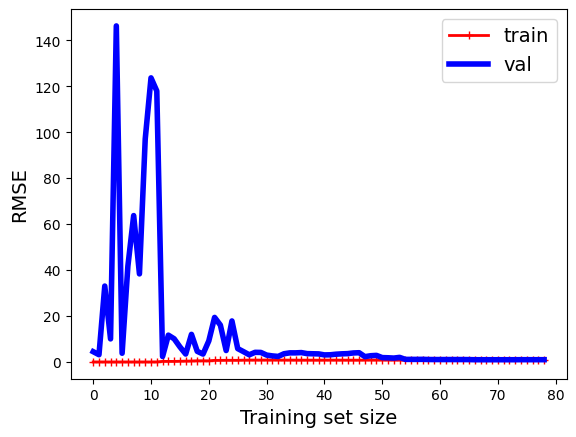

In [36]:
plot_learning_curves(polynomial_reg,X,y)

# Bias/ Variance Trade-off

### Bias:

- due to wrong assumptions, high bias model is most likely to underfit the training data

### Variance:

- This part is due to model's exessive sensitivity to small variations in the training data. A model with many degrees of freedom is likely to have high variance and thus overfit the training data.

### Irreducible error

- This part is due to the noisiness of the data itself. The only way to reduce this part of the error is to clean up the data.

- increasing a model's complexity will typically increase its variance and reduce its bias.
- Conversely, reducing a model's omplexity increases its bias and reduces its variance.


# RIDGE REGRESSION(Tikhonov)

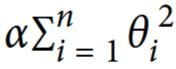

- the regularization term is added to the cost function.
- forces the model to not only fit the data but also keep the weights as small as possible.
- only added during training.

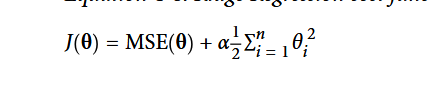

- hyperparameter alpha controls how much you want to regularize the model.


In [39]:
m=20
X=3*np.random.rand(m,1)
y=1+0.5*X+np.random.randn(m,1)/1.5
X_new=np.linspace(0,3,100).reshape(100,1)


In [42]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=1,solver="cholesky",random_state=42)
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([1.73450372])

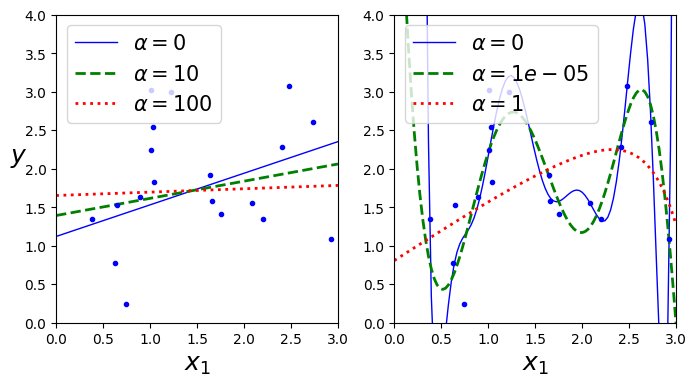

In [40]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()

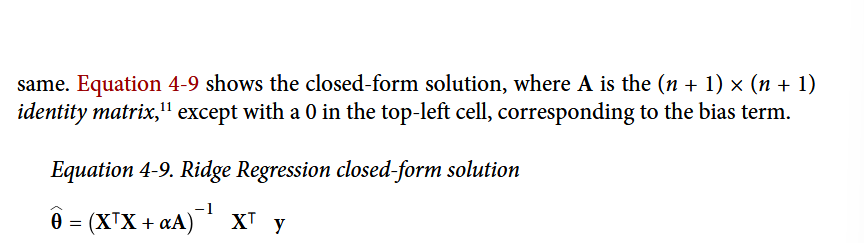


In [43]:
sgd_reg=SGDRegressor(penalty= "l2",max_iter=1000,tol=1e-3,random_state=42)
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])
"""Specifying l2 as penalty, we use SGD to add a regularization term to the cost function equal to half the square of the l2 norm of the weight vector"""

'Specifying l2 as penalty, we use SGD to add a regularization term to the cost function equal to half the square of the l2 norm of the weight vector'

# LASSO REGRESSION(Least Absolute Shrinkage and Selection Operator Regression)

- uses l1 norm
  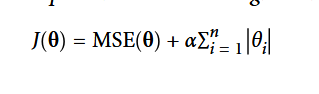
- eliminates the least important features.
- all weights for high-degree polynomial features are equal to zero.
- automatically performs feature selection and outputs a sparse model.

- lasso cost function is not differentiable at theta=0, but GD still works fine if we use a subgradient vector g.
  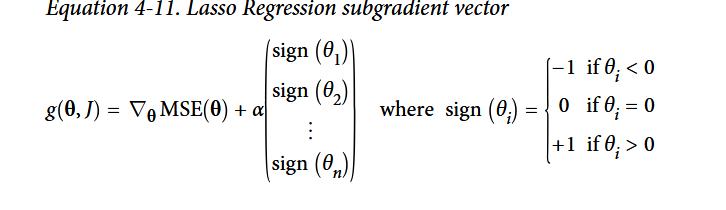


d:\9\machine learning\hands on\machine-learning-hands-on-\machine-learning-hands-on\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.371e+00, tolerance: 1.707e-03
  model = cd_fast.enet_coordinate_descent(


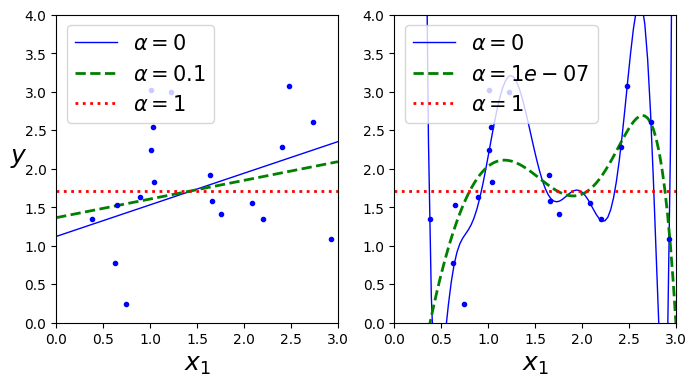

In [45]:
from sklearn.linear_model import Lasso
plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso,polynomial=False,alphas=(0,0.1,1),random_state=42)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.subplot(122)
#
plot_model(Lasso,polynomial=True,alphas=(0,10**-7,1),random_state=42)
plt.show()

In [46]:
lasso_reg=Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([1.72772251])

# ELASTIC NET

- middle ground between Ridge regression and Lasso Regression.
- control the mix ratio r.
- when r=-0, elastic net is ridge
- when r=1, elastic net is lasso

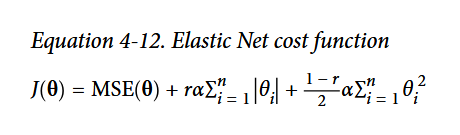


In [47]:
from sklearn.linear_model import ElasticNet
elastic_net=ElasticNet(alpha=0.1,l1_ratio=0.5,random_state=42)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([1.73064539])

# EARLY STOPPING

- stops training as soon as the validation error reaches a minimum
- after a while the error starts increasing again, meaning that the model overfits the data


In [48]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [49]:
from copy import deepcopy

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

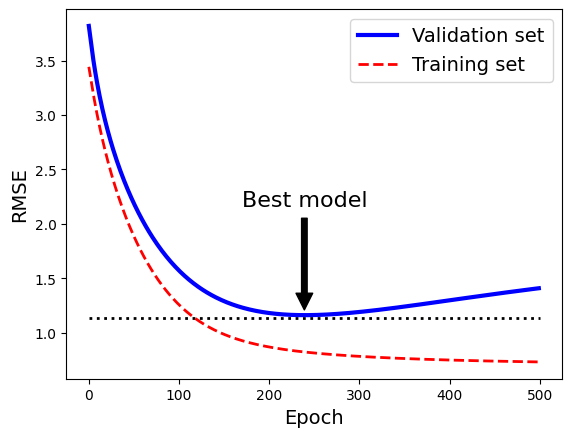

In [50]:
sgd_reg=SGDRegressor(max_iter=1,tol=None,warm_start=True,penalty=None,learning_rate="constant",eta0=0.0005,random_state=42)
n_epochs=500
train_errors,val_errors=[],[]
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled,y_train)
    y_train_predict=sgd_reg.predict(X_train_poly_scaled)
    y_val_predict=sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train,y_train_predict))
    val_errors.append(mean_squared_error(y_val,y_val_predict))
best_epoch=np.argmin(val_errors)
best_val_rmse=np.sqrt(val_errors[best_epoch])
plt.annotate('Best model',
             xy=(best_epoch,best_val_rmse),
             xytext=(best_epoch,best_val_rmse+1),
             ha="center",
             arrowprops=dict(facecolor='black',shrink=0.05),
             fontsize=16,
             )
best_val_rmse-=0.03
plt.plot([0,n_epochs],[best_val_rmse,best_val_rmse],"k:",linewidth=2)
plt.plot(np.sqrt(val_errors),"b-",linewidth=3,label="Validation set")
plt.plot(np.sqrt(train_errors),"r--",linewidth=2,label="Training set")
plt.legend(loc="upper right",fontsize=14)
plt.xlabel("Epoch",fontsize=14)
plt.ylabel("RMSE",fontsize=14)
plt.show()

In [51]:
best_epoch,best_model

(np.int64(239),
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, tol=None, warm_start=True))

In [52]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

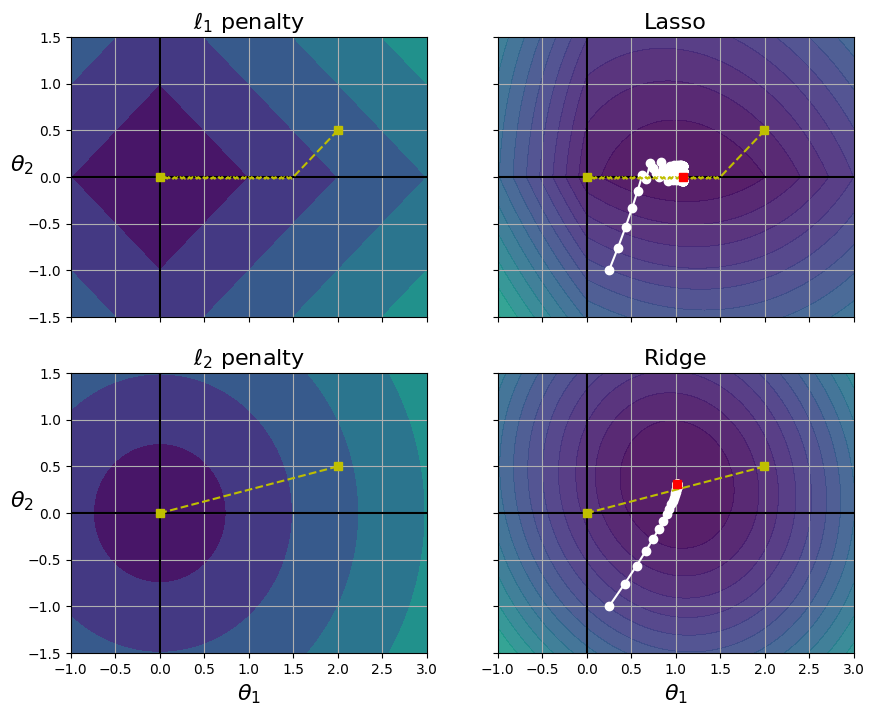

In [53]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.05, n_iterations = 200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + l2 * theta
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))
for i, N, l1, l2, title in ((0, N1, 2., 0, "Lasso"), (1, N2, 0,  2., "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(np.array([[2.0], [0.5]]), Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    ax = axes[i, 0]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, N / 2., levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)
    ax.set_ylabel(r"$\theta_2$", fontsize=16, rotation=0)

    ax = axes[i, 1]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title, fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)


plt.show()

# LOGISTIC REGRESSION(Logit Regression)

- used to estimate the probability that an instance belongs to a particular class
- if estimated probability is greater than 50% thent he model predicts that the instance belongs to that class(posiitve class, labeled as 1)
- otherwise it predicts that it does not(negative class , labelled as 0)
- computes a weighted sum of the input features(plus a bias term), but instead of outputting the result directly like the Linear Regression model does, it outputs the logistic of this result.

- 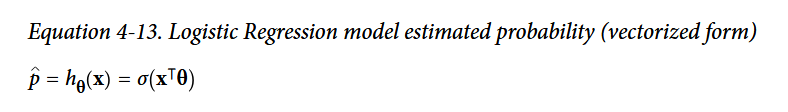

- sigmoid function:
  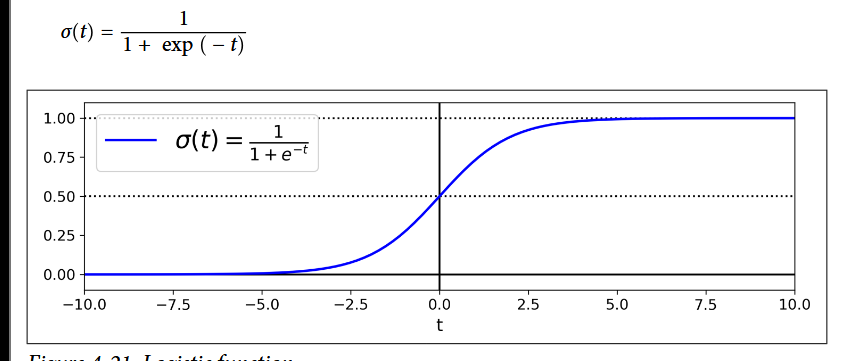

- t is known as logit.
- logit(p)=log(p/(1-p)); inverse of the logistic function; also known as log-odds

- log of the ratio between the estimated probability for the positive class and the estimated probability for the negative class.


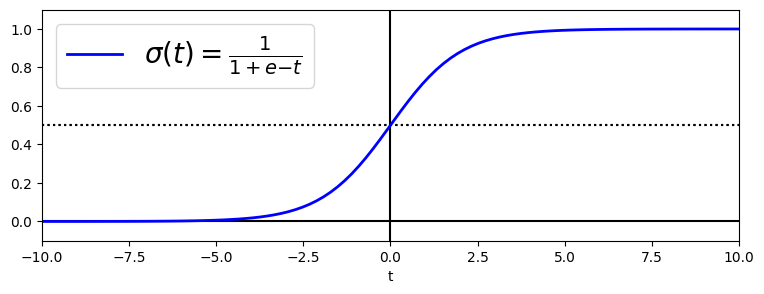

In [54]:
t=np.linspace(-10,10,100)
sig=1/(1+np.exp(-t))
plt.figure(figsize=(9,3))
plt.plot([-10,10],[0,0],'k-')
plt.plot([-10,10],[0.5,0.5],'k:')
plt.plot([-10,10],[.5,.5],'k:')
plt.plot([0,0],[-1.1,1.1],'k-')
plt.plot(t,sig,'b-',linewidth=2,label=r"$\sigma(t)=\frac{1}{1+e{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left",fontsize=20)
plt.axis([-10,10,-0.1,1.1])
plt.show()

# Training and cost functions

- c(theta)={

  - -log(p); if y=1
  - -log(1-p); if y=0
    }

- 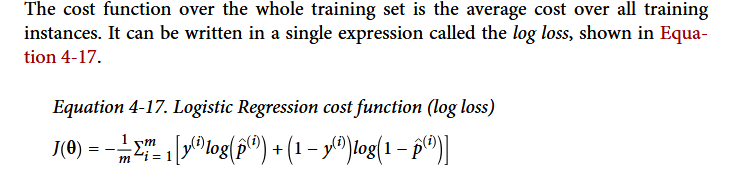
- convex function


# Decision boundaries


In [55]:
from sklearn import datasets
iris=datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [56]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [61]:
x=iris["data"][:,3:]
y=(iris["target"]==2).astype(int)

In [64]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(solver='lbfgs',random_state=42)
log_reg.fit(x,y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


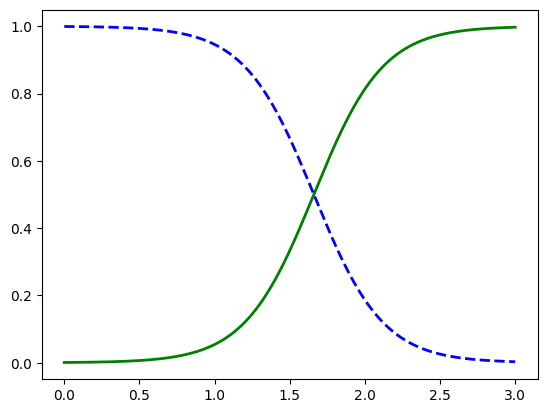

In [67]:
x_new=np.linspace(0,3,1000).reshape(-1,1)
y_proba=log_reg.predict_proba(x_new)
plt.plot(x_new,y_proba[:,1],"g-",linewidth=2,label="Iris virginica")
plt.plot(x_new,y_proba[:,0],"b--",linewidth=2,label="Not Iris virginica")
plt.show()


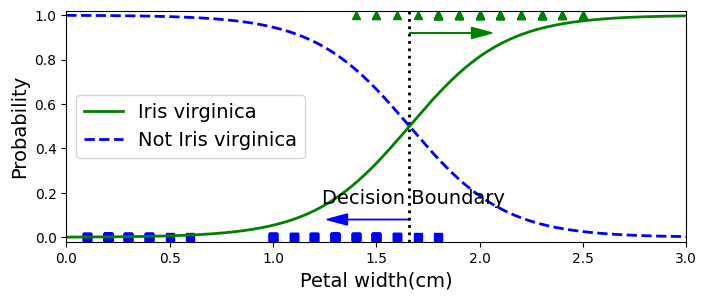

In [68]:
x_new=np.linspace(0,3,1000).reshape(-1,1)
y_proba=log_reg.predict_proba(x_new)
decision_boundary=x_new[np.argmax(y_proba[:,1]>=0.5)][0]
plt.figure(figsize=(8,3))
plt.plot(x[y==0],y[y==0],'bs')
plt.plot(x[y==1],y[y==1],"g^")
plt.plot([decision_boundary,decision_boundary],[-1,2],'k:',linewidth=2)
plt.plot(x_new,y_proba[:,1],'g-',linewidth=2,label='Iris virginica')
plt.plot(x_new,y_proba[:,0],'b--',linewidth=2,label="Not Iris virginica")
plt.text(decision_boundary+0.02,0.15,"Decision Boundary",fontsize=14,color="k",ha="center")
plt.arrow(decision_boundary,0.08,-0.3,0,head_width=0.05,head_length=0.1,fc='b',ec='b')
plt.arrow(decision_boundary,0.92,0.3,0,head_width=0.05,head_length=0.1,fc='g',ec='g')
plt.xlabel("Petal width(cm)",fontsize=14)
plt.ylabel("Probability",fontsize=14)
plt.legend(loc="center left",fontsize=14)
plt.axis([0,3,-0.02,1.02])
plt.show()

- in the area of overlap, the classifier is unsure.
- therefore used decision boundary


In [69]:
decision_boundary

np.float64(1.6606606606606606)

In [70]:
log_reg.predict([[1.5],[1.7]])

array([0, 1])

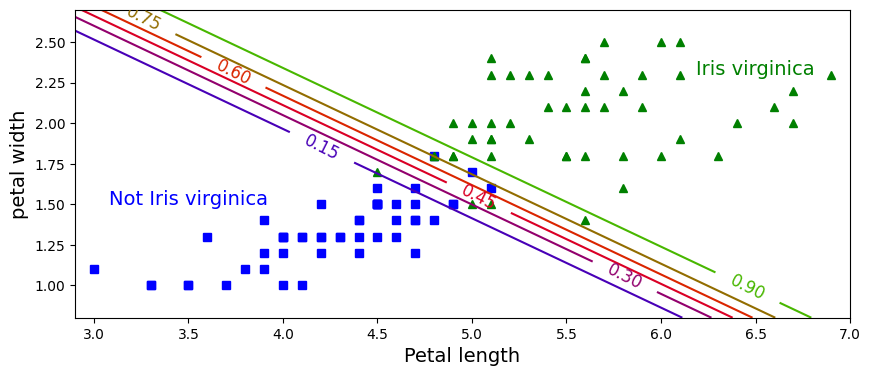

In [71]:
x=iris['data'][:,(2,3)]
y=(iris['target']==2).astype(int)
log_reg=LogisticRegression(solver='lbfgs',C=10**10,random_state=42)
log_reg.fit(x,y)
x0,x1=np.meshgrid(np.linspace(2.9,7,500).reshape(-1,1),
                  np.linspace(0.8,2.7,200).reshape(-1,1),
                  )
x_new=np.c_[x0.ravel(),x1.ravel()]
y_proba=log_reg.predict_proba(x_new)
plt.figure(figsize=(10,4))
plt.plot(x[y==0,0],x[y==0,1],'bs')
plt.plot(x[y==1,0],x[y==1,1],'g^')
zz=y_proba[:,1].reshape(x0.shape)
contour=plt.contour(x0,x1,zz,cmap=plt.cm.brg)
left_right=np.array([2.9,7])
boundary=-(log_reg.coef_[0][0]*left_right+log_reg.intercept_[0]/log_reg.coef_[0][1])
plt.clabel(contour,inline=1,fontsize=12)
plt.plot(left_right,boundary,"k--",linewidth=3)
plt.text(3.5,1.5,"Not Iris virginica",fontsize=14,color='b',ha='center')
plt.text(6.5,2.3,"Iris virginica",fontsize=14,color='g',ha='center')
plt.xlabel("Petal length",fontsize=14)
plt.ylabel("petal width",fontsize=14)
plt.axis([2.9,7,0.8,2.7])
plt.show()

# Softmax Regression(multinomail logistic regression)

- logistic regression supporting multiple classes directly.
- when given an instance x, the Softmax regression model first computes a score sk(x) for each class k, then estimates the probability of each class by applying the softmax to the scores.

- ```
  s_k(x)=x.T.dot(theta_k)
  ```
- each class has its own dedicated parameter vector theta_k. All these are stored as rows in a parameter matrix.

- now estimate the probability that the instance belongs to class k by running the scores through the softmax function.
- it computes the exponential of every score, then normalizes them(dividing the sum of all exponentials).
- generally called logits or log-odds

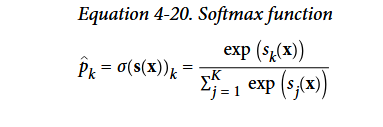

- k is the number of classes
- s(x) is a vector containing the scores of each class for the instance x.
- ¬(s(x)) is the estimated probabilty that the instance x belongs to class k, given the scores of each class for that instance.
- y= argmax(¬(s(x)))=argmax(theta_k.T.dot(x))
- argmax returns the value of the variable that maximizes a function
- it predicts one class at a time ,so it should be used only with mutually exclusive classes.

###### Cost function

- Cross entropy: used to measure how well a set of estimated class probabilities matches the target classes.
- it penalizes the model when it estimates a low probability for a target class

- 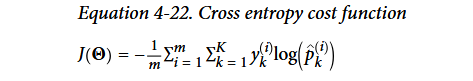

- y*k*(i) is the target probability that the ith instance belongs to class k.

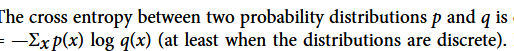

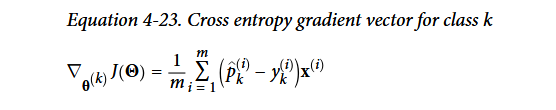


In [72]:
x=iris["data"][:,(2,3)]
y=iris["target"]
softmax_reg=LogisticRegression(multi_class="multinomial",solver='lbfgs',C=10,random_state=42)
softmax_reg.fit(x,y)

d:\9\machine learning\hands on\machine-learning-hands-on-\machine-learning-hands-on\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,10
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'multinomial'


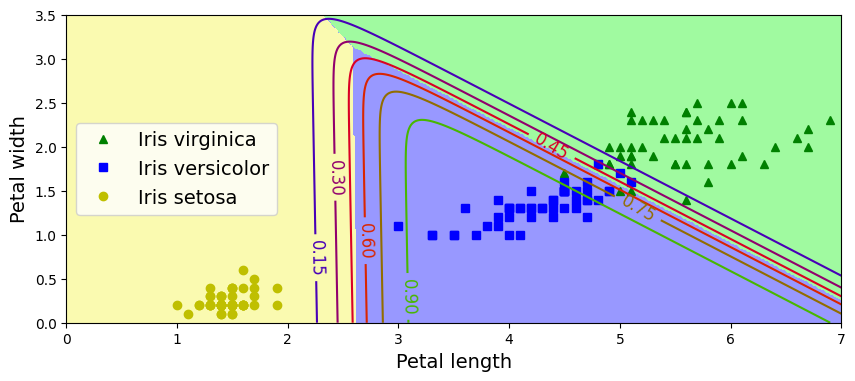

In [73]:
x0,x1=np.meshgrid(
    np.linspace(0,8,500).reshape(-1,1),
    np.linspace(0,3.5,200).reshape(-1,1),
)
x_new=np.c_[x0.ravel(),x1.ravel()]
y_proba=softmax_reg.predict_proba(x_new)
y_predict=softmax_reg.predict(x_new)
zz1=y_proba[:,1].reshape(x0.shape)
zz=y_predict.reshape(x0.shape)
plt.figure(figsize=(10,4))
plt.plot(x[y==2,0],x[y==2,1],"g^",label="Iris virginica")
plt.plot(x[y==1,0],x[y==1,1],'bs',label="Iris versicolor")
plt.plot(x[y==0,0],x[y==0,1],'yo',label="Iris setosa")
from matplotlib.colors import ListedColormap
custom_cmap=ListedColormap(['#fafab0','#9898ff','#a0faa0'])
plt.contourf(x0,x1,zz,cmap=custom_cmap)
contour=plt.contour(x0,x1,zz1,cmap=plt.cm.brg)
plt.clabel(contour,inline=1,fontsize=12)
plt.xlabel("Petal length",fontsize=14)
plt.ylabel("Petal width",fontsize=14)
plt.legend(loc="center left",fontsize=14)
plt.axis([0,7,0,3.5])
plt.show()

In [74]:
softmax_reg.predict([[1,3]])

array([0])

In [75]:
softmax_reg.predict_proba([[1,3]])

array([[9.99472006e-01, 5.27765702e-04, 2.28426606e-07]])

In [76]:
x=iris["data"][:,(2,3)]
y=iris["target"]

In [77]:
x_with_bias=np.c_[np.ones([len(x),1]),x]

In [78]:
np.random.seed(2042)

In [79]:
test_ratio=0.2
validation_ratio=0.2
total_size=len(x_with_bias)
test_size=int(total_size*test_ratio)
validation_size=int(total_size*validation_ratio)
train_size=total_size-test_size-validation_size
rnd_indices=np.random.permutation(total_size)
x_train=x_with_bias[rnd_indices[:train_size]]
y_train=y[rnd_indices[:train_size]]
x_valid=x_with_bias[rnd_indices[train_size:-test_size]]
y_valid=y[rnd_indices[train_size:-test_size]]
x_test=x_with_bias[rnd_indices[-test_size:]]
y_test=y[rnd_indices[-test_size:]]

In [80]:
def to_one_hot(y):
    n_classes=y.max()+1
    m=len(y)
    Y_one_hot=np.zeros((m,n_classes))
    Y_one_hot[np.arange(m),y]=1
    return Y_one_hot

In [81]:
y_train[:10]

array([0, 1, 2, 1, 1, 0, 1, 1, 1, 0])

In [82]:
to_one_hot(y_train[:10])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [83]:
Y_train_one_hot=to_one_hot(y_train)
Y_valid_one_hot=to_one_hot(y_valid)
Y_test_one_hot=to_one_hot(y_test)

In [84]:
def softmax(logits):
    exps=np.exp(logits)
    exp_sums=np.sum(exps,axis=1,keepdims=True)
    return exps/exp_sums

In [85]:
n_inputs=x_train.shape[1]
n_outputs=len(np.unique(y_train))

In [86]:
eta=0.01
n_iterations=5001
m=len(x_train)
epsilon=1e-7
Theta=np.random.randn(n_inputs,n_outputs)
for iteration in range(n_iterations):
    logits=x_train.dot(Theta)
    Y_proba=softmax(logits)
    if iteration%500==0:
        loss=-np.mean(np.sum(Y_train_one_hot*np.log(Y_proba+epsilon),axis=1))
        print(iteration,loss)
    error=Y_proba-Y_train_one_hot
    gradients=1/m*x_train.T.dot(error)
    Theta=Theta-eta*gradients

0 5.446205811872683
500 0.8350062641405651
1000 0.6878801447192402
1500 0.6012379137693313
2000 0.5444496861981872
2500 0.5038530181431525
3000 0.4729228972192248
3500 0.44824244188957774
4000 0.4278651093928793
4500 0.4106007142918712
5000 0.3956780375390374


In [87]:
Theta

array([[ 3.32094157, -0.6501102 , -2.99979416],
       [-1.1718465 ,  0.11706172,  0.10507543],
       [-0.70224261, -0.09527802,  1.4786383 ]])

In [88]:
logits=x_valid.dot(Theta)
Y_Proba=softmax(logits)
Y_PREDICT=np.argmax(Y_Proba,axis=1)
accuracy_score=np.mean(Y_PREDICT==y_valid)
accuracy_score


np.float64(0.9666666666666667)

In [89]:
eta=0.1
n_iterations=5001
m=len(x_train)
epsilon=1e-7
alpha=0.1
Theta=np.random.randn(n_inputs,n_outputs)
for iteration in range(n_iterations):
    logits=x_train.dot(Theta)
    Y_proba=softmax(logits)
    if iteration%500==0:
        xentropy_loss=-np.mean(np.sum(Y_train_one_hot*np.log(Y_proba+epsilon),axis=1))
        l2_loss=1/2*np.sum(np.square(Theta[1:]))
        loss=xentropy_loss+alpha*l2_loss
        print(iteration,loss)
    error=Y_proba-Y_train_one_hot
    gradients=1/m*x_train.T.dot(error)+np.r_[np.zeros([1,n_outputs]),alpha*Theta[1:]]
    Theta=Theta-eta*gradients

0 6.629842469083912
500 0.5339667976629506
1000 0.503640075014894
1500 0.4946891059460321
2000 0.4912968418075477
2500 0.48989924700933296
3000 0.4892990598451198
3500 0.489035124439786
4000 0.4889173621830817
4500 0.4888643337449302
5000 0.4888403120738818


In [90]:
logits=x_valid.dot(Theta)
Y_proba=softmax(logits)
y_predict=np.argmax(Y_proba,axis=1)
accuracy_score=np.mean(y_predict==y_valid)
accuracy_score

np.float64(1.0)

In [91]:
eta=0.1
n_iterations=5001
m=len(x_train)
epsilon=1e-7
alpha=0.1
best_loss=np.infty
Theta=np.random.randn(n_inputs,n_outputs)
for iteration in range(n_iterations):
    logits=x_train.dot(Theta)
    Y_proba=softmax(logits)
    error=Y_proba-Y_train_one_hot
    gradients=1/m*x_train.T.dot(error)+np.r_[np.zeros([1,n_outputs]),alpha*Theta[1:]]
    Theta=Theta-eta*gradients

    logits=x_valid.dot(Theta)
    Y_proba=softmax(logits)
    xentropy_loss=-np.mean(np.sum(Y_valid_one_hot*np.log(Y_proba+epsilon),axis=1))
    l2_loss=1/2*np.sum(np.square(Theta[1:]))
    loss=xentropy_loss+alpha*l2_loss
    if iteration%500==0:
        print(iteration,loss)
    if loss<best_loss:
        best_loss=loss
    else:
        print(iteration-1,best_loss)
        print(iteration,loss,"early stopping!")
        break

AttributeError: `np.infty` was removed in the NumPy 2.0 release. Use `np.inf` instead.

In [ ]:
logits=x_valid.dot(Theta)
Y_proba=softmax(logits)
y_predict=np.argmax(Y_proba,axis=1)
accuracy_score=np.mean(y_predict==y_valid)
accuracy_score

1.0

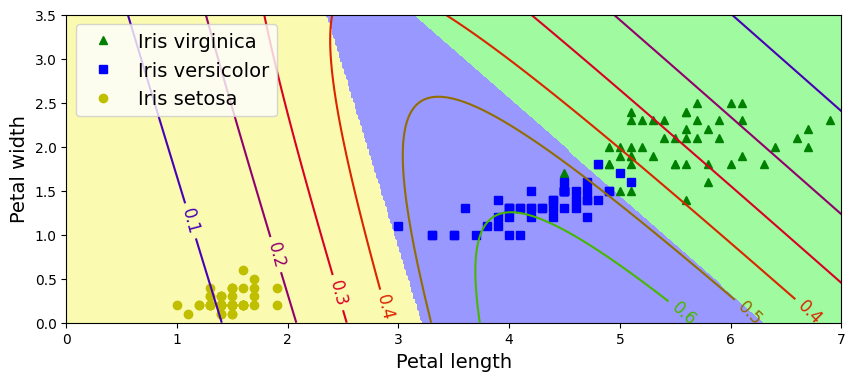

In [ ]:
x0,x1=np.meshgrid(
    np.linspace(0,8,500).reshape(-1,1),
    np.linspace(0,3.5,200).reshape(-1,1),
)
x_new=np.c_[x0.ravel(),x1.ravel()]
x_new_with_bias=np.c_[np.ones([len(x_new),1]),x_new]
logits=x_new_with_bias.dot(Theta)
Y_proba=softmax(logits)
y_predict=np.argmax(Y_proba,axis=1)
zz1=Y_proba[:,1].reshape(x0.shape)
zz=y_predict.reshape(x0.shape)
plt.figure(figsize=(10,4))
plt.plot(x[y==2,0],x[y==2,1],"g^",label="Iris virginica")
plt.plot(x[y==1,0],x[y==1,1],"bs",label="Iris versicolor")
plt.plot(x[y==0,0],x[y==0,1],"yo",label="Iris setosa")
custom_cmap=ListedColormap(['#fafab0','#9898ff','#a0faa0'])
plt.contourf(x0,x1,zz,cmap=custom_cmap)
contour=plt.contour(x0,x1,zz1,cmap=plt.cm.brg)
plt.clabel(contour,inline=1,fontsize=12)
plt.xlabel("Petal length",fontsize=14)
plt.ylabel("Petal width",fontsize=14)
plt.legend(loc="upper left",fontsize=14)
plt.axis([0,7,0,3.5])
plt.show()

In [ ]:
logits=x_test.dot(Theta)
Y_proba=softmax(logits)
y_predict=np.argmax(Y_proba,axis=1)
accuracy_score=np.mean(y_predict==y_test)
accuracy_score

0.9333333333333333